In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import nltk

In [2]:
df=pd.read_csv('women_ecom_reviews.csv',index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
## We can drop title and ID feature because they serve a purpose none diffrent than for identification
# We are only concerned with the review text
df.drop(['Title','Clothing ID'],axis=1,inplace=True)
df.head(3)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [4]:
# Check for missing values
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [5]:
df.shape

(23486, 8)

In [6]:
## On 845 items the review is missing, however we can drop those observations because the size of missing values
# constitutes a neglible proportion of the total reviews
df.dropna(subset=['Review Text','Division Name'],inplace=True)
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [7]:
## Lets create a list of the reviews with 1000 reviews
print(''.join(df['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortableLove this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it cI love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!This shirt is very f

### Feature Engineering

In [8]:
from textblob import TextBlob

In [9]:
## Its important that we be cognizant of the extents of the sentiments of users, Therefore the feature polarity
df['polarity']=df['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [10]:
## For lenghth of reviews
df['review_len']=df['Review Text'].apply(lambda x: len(x))

In [11]:
## For word count
df['word_count']=df['Review Text'].apply(lambda x: len(x.split()))

In [13]:
## Define a function for gettin the average length of words
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)

In [14]:
df['Avg_word_len']=df['Review Text'].apply(lambda x: get_avg_word_len(x))

In [15]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_len,word_count,Avg_word_len
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,53,8,5.750000
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,303,62,3.822581
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,500,98,4.112245
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,124,22,4.681818
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36,4.361111


### Exploratory Data Analysis

#### Distribution of sentiment polarity

Text(0, 0.5, 'Count')

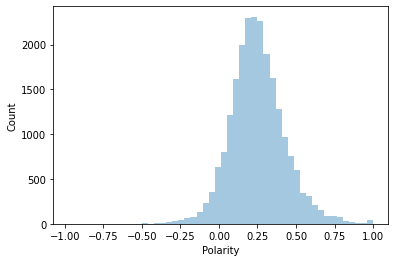

In [16]:
sns.distplot(df['polarity'],kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')

#### Distribution of Reviews Rating and Reviewers Age

Text(0, 0.5, 'Count')

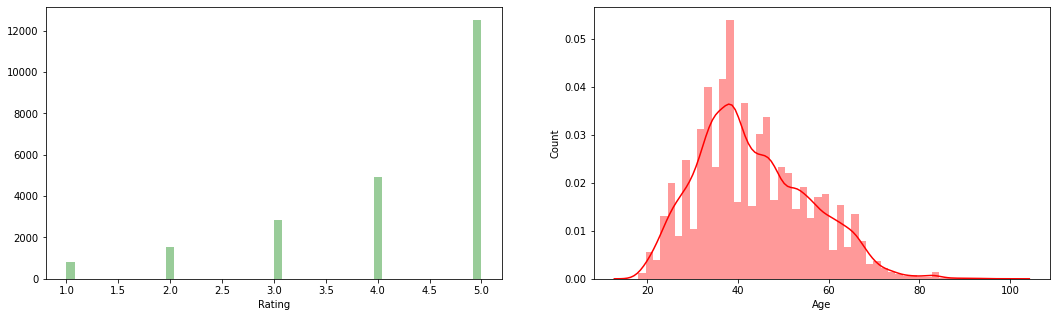

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
sns.distplot(df['Rating'],kde=False,color='g',ax=ax1)
sns.distplot(df['Age'],kde=True,color='r',ax=ax2)
plt.ylabel('Count')

#### Distribution of Review Text Length and Word Length

Text(0, 0.5, 'Count')

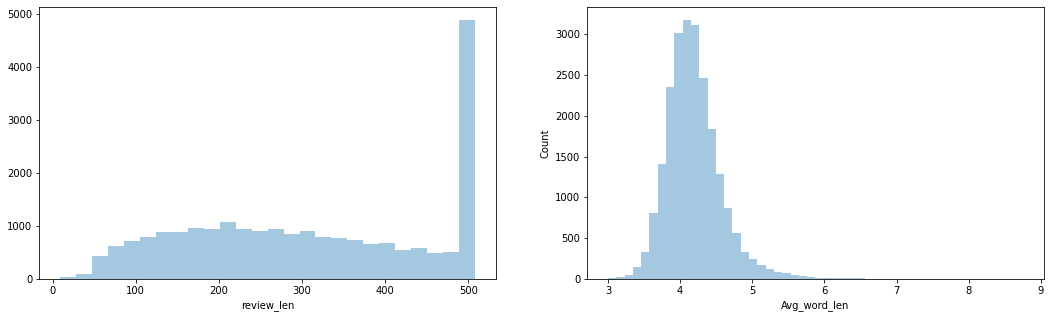

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
sns.distplot(df['review_len'],kde=False,ax=ax1)
sns.distplot(df['Avg_word_len'],kde=False,ax=ax2)
plt.ylabel('Count')

Text(0.5, 0, 'Word Count')

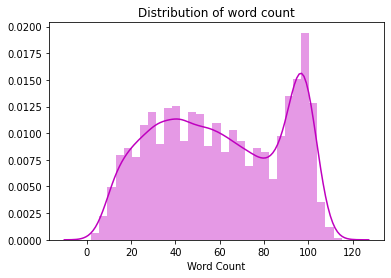

In [19]:
sns.distplot(df['word_count'],kde=True,color='m')
plt.title('Distribution of word count')
plt.xlabel('Word Count')

#### Distribution of Unigram, Bigram and Trigram

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

#### Top 20 Unigrams

In [21]:
def get_top_n_words(x,n):
    vec=CountVectorizer().fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word,idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq,key= lambda x:x[1],reverse=True)
    return words_freq[:n]

In [25]:
words= get_top_n_words(df['Review Text'],20)

In [26]:
words

[('the', 76158),
 ('it', 49273),
 ('and', 48993),
 ('is', 30636),
 ('this', 25758),
 ('to', 24577),
 ('in', 20722),
 ('but', 16549),
 ('on', 15325),
 ('for', 13994),
 ('of', 13427),
 ('with', 12797),
 ('was', 12220),
 ('so', 12017),
 ('my', 11027),
 ('dress', 10567),
 ('that', 10011),
 ('not', 9796),
 ('love', 8945),
 ('size', 8770)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'the'),
  Text(1, 0, 'it'),
  Text(2, 0, 'and'),
  Text(3, 0, 'is'),
  Text(4, 0, 'this'),
  Text(5, 0, 'to'),
  Text(6, 0, 'in'),
  Text(7, 0, 'but'),
  Text(8, 0, 'on'),
  Text(9, 0, 'for'),
  Text(10, 0, 'of'),
  Text(11, 0, 'with'),
  Text(12, 0, 'was'),
  Text(13, 0, 'so'),
  Text(14, 0, 'my'),
  Text(15, 0, 'dress'),
  Text(16, 0, 'that'),
  Text(17, 0, 'not'),
  Text(18, 0, 'love'),
  Text(19, 0, 'size')])

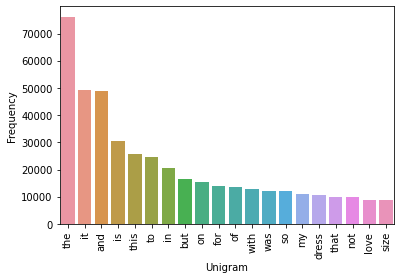

In [31]:
df1=pd.DataFrame(words,columns=['Unigram','Frequency'])
sns.barplot(x='Unigram',y='Frequency',data=df1)
plt.xticks(rotation=90)

#### Top 20 Bigrams

In [34]:
def get_top_n_words1(x,n):
    vec=CountVectorizer(ngram_range=(2,2)).fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word,idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq,key= lambda x:x[1],reverse=True)
    return words_freq[:n]

In [35]:
words1= get_top_n_words1(df['Review Text'],20)

In [36]:
df2=pd.DataFrame(words1,columns=['Bigrams','Frequency'])
df2.head()

,Bigrams,Frequency
0,in the,7169
1,it is,6168
2,and the,5613
3,this dress,4758
4,on the,4337


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'in the'),
  Text(1, 0, 'it is'),
  Text(2, 0, 'and the'),
  Text(3, 0, 'this dress'),
  Text(4, 0, 'on the'),
  Text(5, 0, 'of the'),
  Text(6, 0, 'and it'),
  Text(7, 0, 'it was'),
  Text(8, 0, 'this top'),
  Text(9, 0, 'this is'),
  Text(10, 0, 'the fabric'),
  Text(11, 0, 'love the'),
  Text(12, 0, 'love this'),
  Text(13, 0, 'is very'),
  Text(14, 0, 'to wear'),
  Text(15, 0, 'but it'),
  Text(16, 0, 'the dress'),
  Text(17, 0, 'with the'),
  Text(18, 0, 'for me'),
  Text(19, 0, 'but the')])

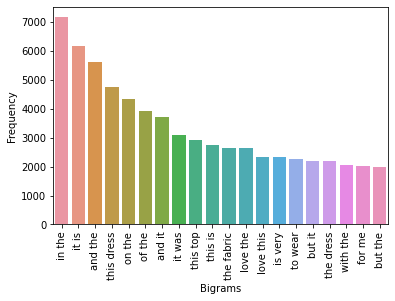

In [38]:
sns.barplot(x='Bigrams',y='Frequency',data=df2)
plt.xticks(rotation=90)

#### Top 20 Trigrams

In [39]:
def get_top_n_words2(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [40]:
words2=get_top_n_words2(df['Review Text'],20)

In [41]:
df3 = pd.DataFrame(words2, columns = ['Trigram', 'Frequency'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'true to size'),
  Text(1, 0, 'the fabric is'),
  Text(2, 0, 'this dress is'),
  Text(3, 0, 'the material is'),
  Text(4, 0, 'in the store'),
  Text(5, 0, 'on the model'),
  Text(6, 0, 'the fit is'),
  Text(7, 0, 'this top is'),
  Text(8, 0, 'the color is'),
  Text(9, 0, 'love this dress'),
  Text(10, 0, 'tried it on'),
  Text(11, 0, 'it is very'),
  Text(12, 0, 'and it is'),
  Text(13, 0, 'and it was'),
  Text(14, 0, 'in the back'),
  Text(15, 0, 'up or down'),
  Text(16, 0, 'the dress is'),
  Text(17, 0, 'to wear it'),
  Text(18, 0, 'love this top'),
  Text(19, 0, 'the colors are')])

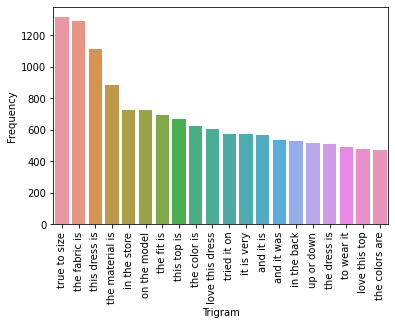

In [43]:
sns.barplot(x='Trigram',y='Frequency',data=df3)
plt.xticks(rotation=90)

#### Unigrams,bigrams & trigrams without stop words

In [45]:
from nltk.corpus import stopwords

In [50]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [51]:
words = get_top_n_words(df['Review Text'], 20)

In [52]:
uni_dt=pd.DataFrame(words,columns=['Unigrams','Frequency'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dress'),
  Text(1, 0, 'love'),
  Text(2, 0, 'size'),
  Text(3, 0, 'fit'),
  Text(4, 0, 'like'),
  Text(5, 0, 'wear'),
  Text(6, 0, 'great'),
  Text(7, 0, 'just'),
  Text(8, 0, 'fabric'),
  Text(9, 0, 'small'),
  Text(10, 0, 'color'),
  Text(11, 0, 'look'),
  Text(12, 0, 'really'),
  Text(13, 0, 'ordered'),
  Text(14, 0, 'little'),
  Text(15, 0, 'perfect'),
  Text(16, 0, 'flattering'),
  Text(17, 0, 'soft'),
  Text(18, 0, 'comfortable'),
  Text(19, 0, 'cute')])

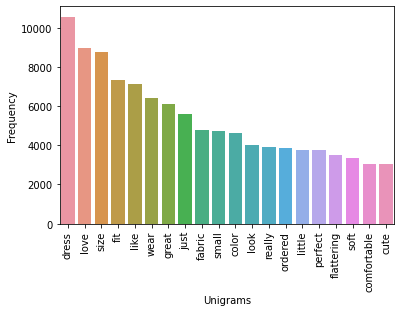

In [53]:
sns.barplot(x='Unigrams',y='Frequency',data=uni_dt)
plt.xticks(rotation=90)

#### Top 20 Bigrams

In [54]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [55]:
words = get_top_n_words(df['Review Text'], 20)

In [56]:
bi_dt=pd.DataFrame(words, columns=['Bigrams','Frequency'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'true size'),
  Text(1, 0, 'love dress'),
  Text(2, 0, 'usually wear'),
  Text(3, 0, 'looks great'),
  Text(4, 0, 'fit perfectly'),
  Text(5, 0, 'size small'),
  Text(6, 0, 'fits perfectly'),
  Text(7, 0, 'usual size'),
  Text(8, 0, 'look like'),
  Text(9, 0, 'just right'),
  Text(10, 0, 'ordered size'),
  Text(11, 0, 'love love'),
  Text(12, 0, 'looks like'),
  Text(13, 0, 'runs large'),
  Text(14, 0, 'super cute'),
  Text(15, 0, 'highly recommend'),
  Text(16, 0, 'wear size'),
  Text(17, 0, 'fabric soft'),
  Text(18, 0, 'feel like'),
  Text(19, 0, 'fit great')])

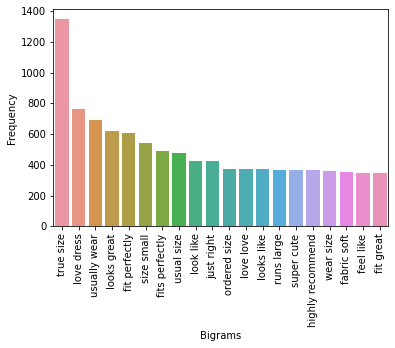

In [57]:
sns.barplot(x='Bigrams',y='Frequency',data=bi_dt)
plt.xticks(rotation=90)

#### Top 20 Trigrams

In [23]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [24]:
words = get_top_n_words(df['Review Text'], 20)
tri_dt=pd.DataFrame(words,columns=['Trigrams','Frequency'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'fits true size'),
  Text(1, 0, 'fit true size'),
  Text(2, 0, 'runs true size'),
  Text(3, 0, 'love love love'),
  Text(4, 0, 'usually wear size'),
  Text(5, 0, 'ordered usual size'),
  Text(6, 0, 'does run large'),
  Text(7, 0, 'really wanted love'),
  Text(8, 0, 'wanted love dress'),
  Text(9, 0, 'usually wear small'),
  Text(10, 0, 'small fit perfectly'),
  Text(11, 0, 'looks great jeans'),
  Text(12, 0, 'fit like glove'),
  Text(13, 0, 'usually wear medium'),
  Text(14, 0, 'normally wear size'),
  Text(15, 0, 'small fits perfectly'),
  Text(16, 0, 'size fit perfectly'),
  Text(17, 0, 'fits like glove'),
  Text(18, 0, 'usual size small'),
  Text(19, 0, 'usually wear xs')])

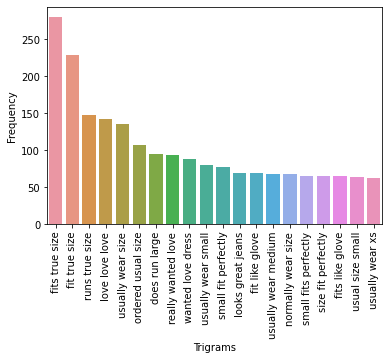

In [25]:
sns.barplot(x='Trigrams',y='Frequency',data=tri_dt)
plt.xticks(rotation=90)

#### Distribution of Top 20 Parts-of-Speech POS tags

In [26]:
print(str(df['Review Text']))

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object


In [27]:
blob= TextBlob(str(df['Review Text']))

In [28]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [29]:
pos_df=pd.DataFrame(blob.tags,columns=['words','pos'])
pos_df=pos_df['pos'].value_counts()
pos_df

NN     25
DT     15
JJ     12
CD     11
PRP     8
RB      6
VBZ     5
IN      5
VBP     4
NNP     4
VBD     4
CC      4
TO      3
VB      2
NNS     2
PDT     1
Name: pos, dtype: int64

<AxesSubplot:>

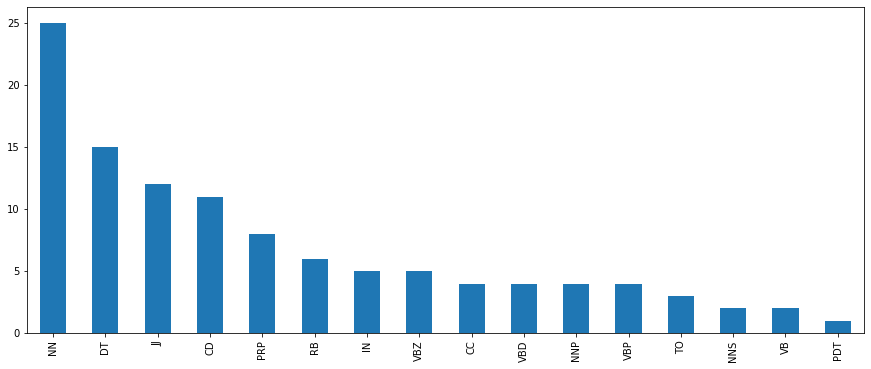

In [37]:
pos_df.sort_values(ascending=False).plot.bar(figsize=(15,6))

#### Bivariate Analysis

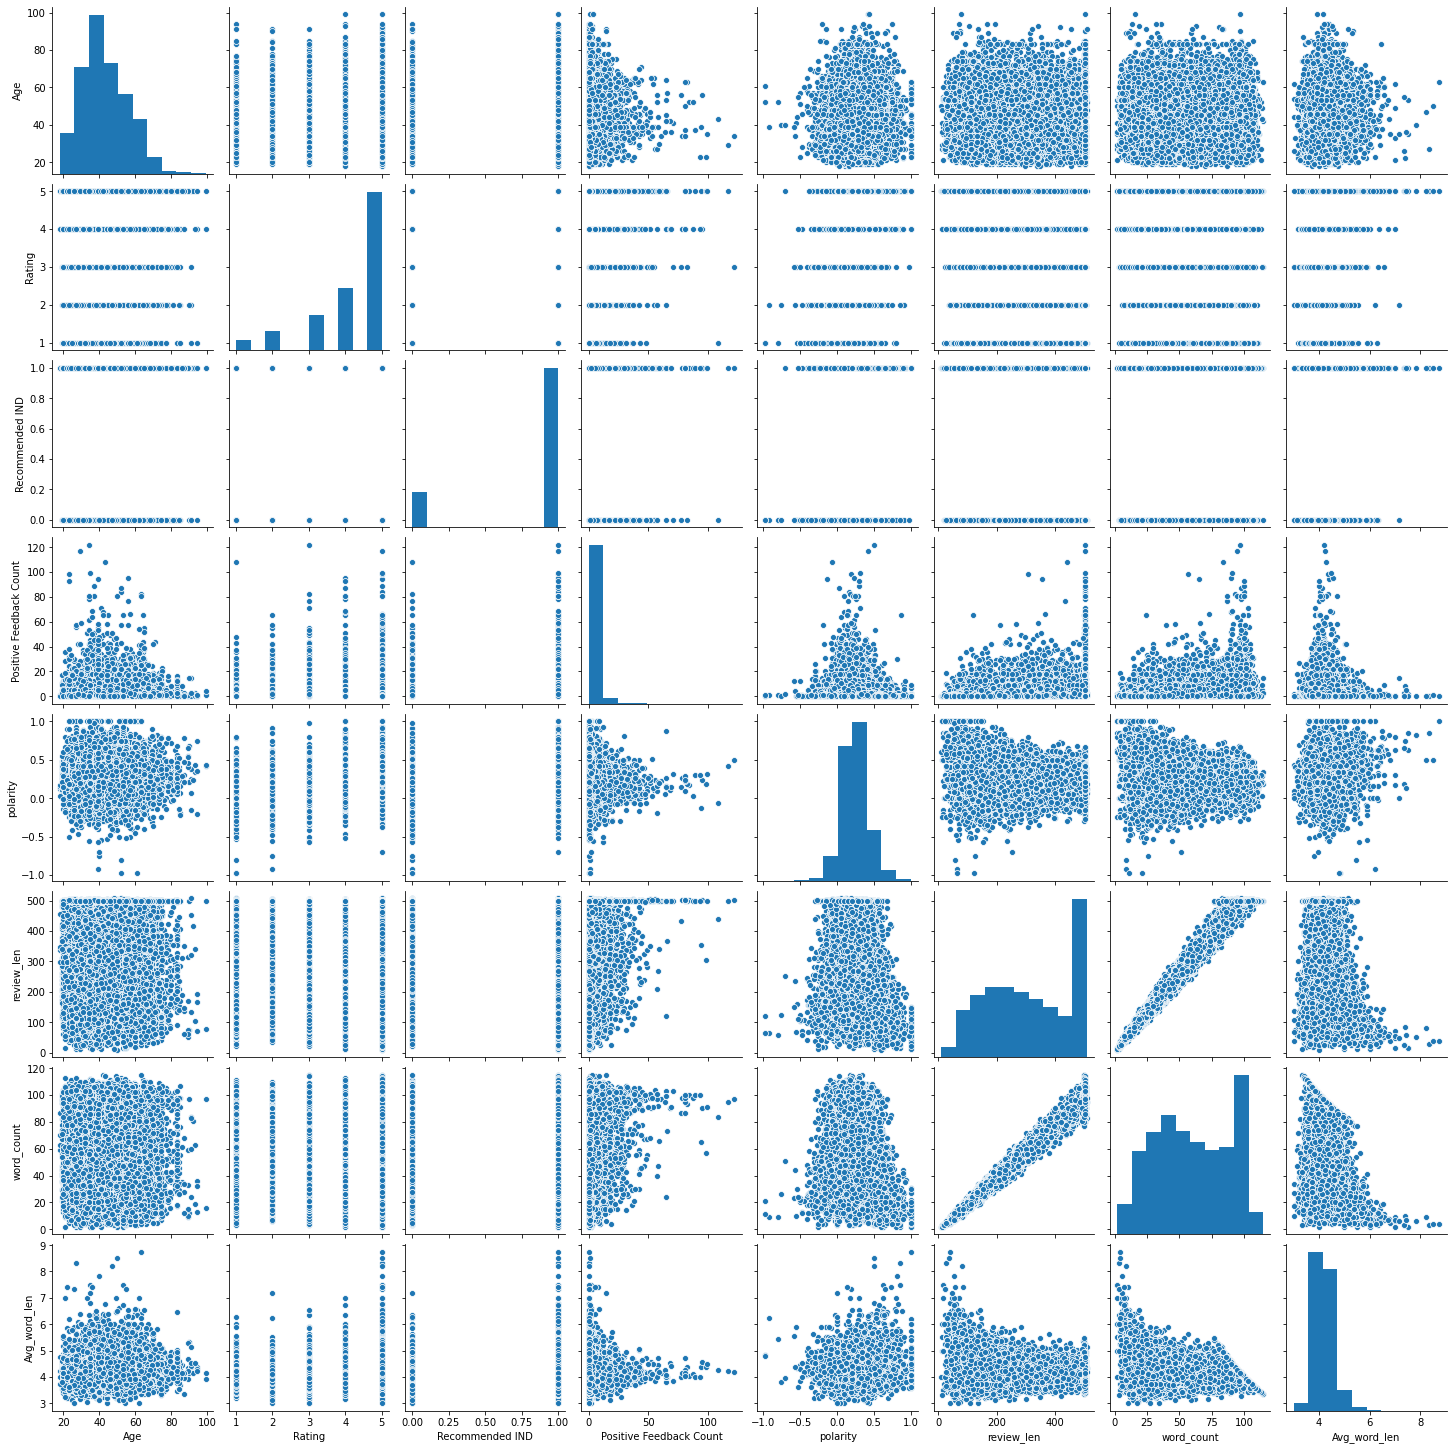

In [38]:
sns.pairplot(df)

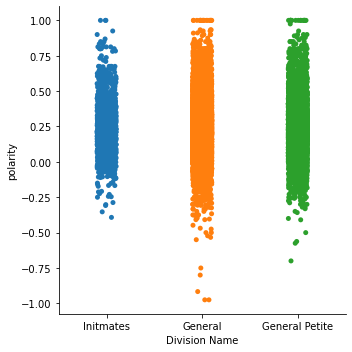

In [39]:
sns.catplot(x='Division Name', y='polarity', data=df)

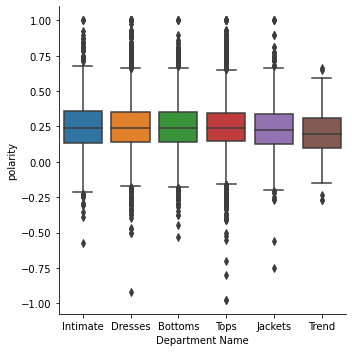

In [40]:
sns.catplot(x = 'Department Name', y = 'polarity', data = df, kind = 'box')

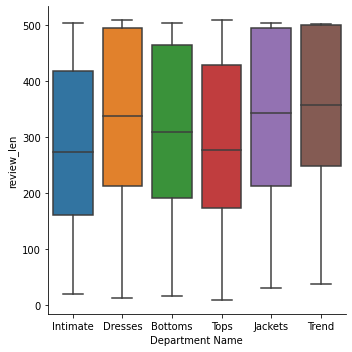

In [41]:
sns.catplot(x = 'Department Name', y = 'review_len', data = df, kind = 'box')

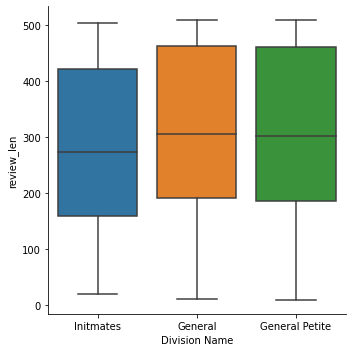

In [42]:
sns.catplot(x = 'Division Name', y = 'review_len', data = df, kind = 'box')

In [58]:
df.to_csv("women_reviews_modified.csv")